In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pylab

In [5]:
img = cv2.imread("D:\pythonworkplace\AI_CV\week2\Lenna.png")

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

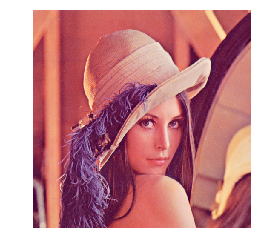

In [7]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
# Gaussian Kernel Effect
g_img = cv2.GaussianBlur(img, (7,7), 5) 
#cv2.GaussianBlur? (src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])   

 $$G(x,y)=\frac{1}{2\pi\sigma^2}e^{-\frac{(x-m/2)^2+(y-n/2)^2}{2\sigma^2}}$$

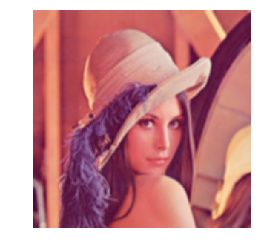

In [9]:
plt.imshow(g_img)
plt.axis('off')
plt.show()

In [10]:
# 图像变得更模糊，因为范围更大，平均效果更明显
g_img = cv2.GaussianBlur(img, (17,17), 5)

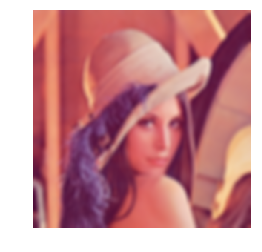

In [11]:
plt.imshow(g_img)
plt.axis('off')
plt.show()

In [12]:
# 图像更清晰，因为方差更小，高斯图像更尖锐，中心点起的作用更大
g_img = cv2.GaussianBlur(img, (7,7), 1)

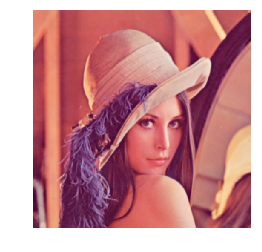

In [13]:
plt.imshow(g_img)
plt.axis('off')
plt.show()

In [14]:
# 来看看高斯核
kernel = cv2.getGaussianKernel(7,5)

In [15]:
print(kernel)

[[0.12895603]
 [0.14251846]
 [0.15133131]
 [0.1543884 ]
 [0.15133131]
 [0.14251846]
 [0.12895603]]


In [16]:
# 为啥一维， 因为一维运算快
# 理论解释
# 用显式的代码看隐式的高斯和显式的分步高斯的效果

In [17]:
g1_img = cv2.GaussianBlur(img, (7,7),5)

In [18]:
g2_img = cv2.sepFilter2D(img, -1, kernel, kernel) # ori, depth, kernelX, kernelY
#cv2.sepFilter2D

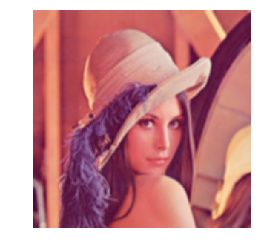

In [19]:
plt.imshow(g1_img)
plt.axis('off')
plt.show()

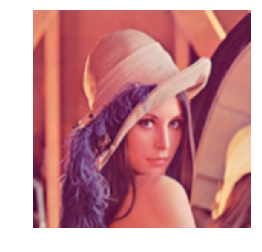

In [20]:
plt.imshow(g2_img)
plt.axis('off')
plt.show()

In [21]:
################Other Application###############

In [22]:
# 2nd derivation:laplacian (双边缘效果)

In [23]:
kernel_lap = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], np.float32)
kernel_lap

array([[ 0.,  1.,  0.],
       [ 1., -4.,  1.],
       [ 0.,  1.,  0.]], dtype=float32)

In [24]:
lap_img = cv2.filter2D(img, -1, kernel = kernel_lap)
lap_img

array([[[ 0,  0,  0],
        [ 0,  0,  8],
        [ 3,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [42, 62, 40]],

       [[ 0,  0,  0],
        [ 0,  0,  8],
        [ 3,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [42, 62, 40]],

       [[ 0,  0,  0],
        [ 0,  0,  8],
        [ 3,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [42, 62, 40]],

       ...,

       [[ 0,  9,  0],
        [ 8, 18,  0],
        [ 0,  0,  5],
        ...,
        [ 5,  0,  0],
        [ 9,  1, 17],
        [ 0, 25,  0]],

       [[ 2,  0,  3],
        [16,  6,  8],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  5],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [14, 10,  5],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 2,  2,  0],
        [ 0,  0,  0]]], dtype=uint8)

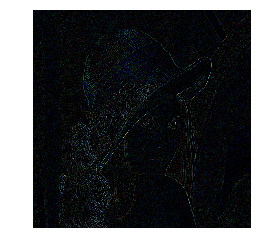

In [25]:
plt.imshow(lap_img)
plt.axis('off')
plt.show()

In [26]:
# 应用：图像锐化 = edge+ ori
# App：sharpen
# 图像+edge = 更锐利的图像，因为突出边缘

In [27]:
kernel_sharp = np.array([[0, 1, 0], [1, -3, 1], [0, 1, 0]], np.float32)
kernel_sharp

array([[ 0.,  1.,  0.],
       [ 1., -3.,  1.],
       [ 0.,  1.,  0.]], dtype=float32)

In [28]:
lap_img = cv2.filter2D(img, -1, kernel = kernel_sharp)
lap_img

array([[[226, 137, 125],
        [223, 137, 133],
        [226, 136, 120],
        ...,
        [225, 131, 111],
        [209, 117, 102],
        [242, 161, 130]],

       [[226, 137, 125],
        [223, 137, 133],
        [226, 136, 120],
        ...,
        [225, 131, 111],
        [209, 117, 102],
        [242, 161, 130]],

       [[226, 137, 125],
        [223, 137, 133],
        [226, 136, 120],
        ...,
        [225, 131, 111],
        [209, 117, 102],
        [242, 161, 130]],

       ...,

       [[ 84,  27,  57],
        [ 92,  36,  55],
        [ 88,  17,  63],
        ...,
        [178,  56,  64],
        [181,  69,  93],
        [165,  87,  78]],

       [[ 84,  18,  60],
        [ 98,  28,  65],
        [ 75,  13,  53],
        ...,
        [173,  70,  84],
        [174,  70,  74],
        [169,  56,  79]],

       [[ 82,  22,  57],
        [ 96,  32,  62],
        [ 79,  18,  57],
        ...,
        [179,  67,  79],
        [183,  73,  79],
        [177,  68,  81]]

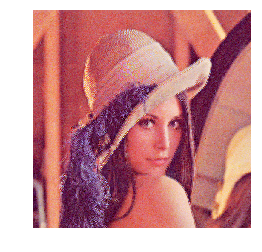

In [29]:
plt.imshow(lap_img)
plt.axis('off')
plt.show()

In [30]:
# 这样不对，因为周围有4个1，中间是-3，虽然有边缘效果，但是周围的1会使得原kernel有滤波的效果
# 解决：所以取kernel_lap的相反数，再加上原图像，这样突出了中心像素，效果类似于小方差的高斯
# 所以，可以既有边缘效果，又保留图像清晰度

In [31]:
kernel_sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)
kernel_sharp

array([[ 0., -1.,  0.],
       [-1.,  5., -1.],
       [ 0., -1.,  0.]], dtype=float32)

In [32]:
lap_img = cv2.filter2D(img, -1, kernel = kernel_sharp)
lap_img

array([[[226, 137, 125],
        [229, 137, 117],
        [220, 138, 146],
        ...,
        [235, 165, 133],
        [233, 143, 118],
        [158,  37,  50]],

       [[226, 137, 125],
        [229, 137, 117],
        [220, 138, 146],
        ...,
        [235, 165, 133],
        [233, 143, 118],
        [158,  37,  50]],

       [[226, 137, 125],
        [229, 137, 117],
        [220, 138, 146],
        ...,
        [235, 165, 133],
        [233, 143, 118],
        [158,  37,  50]],

       ...,

       [[ 84,   9,  63],
        [ 76,   0,  65],
        [ 96,  37,  53],
        ...,
        [168,  90, 104],
        [163,  67,  59],
        [189,  37,  80]],

       [[ 80,  26,  54],
        [ 66,  16,  49],
        [117,  51,  71],
        ...,
        [185,  70,  74],
        [188,  72,  88],
        [201,  92,  83]],

       [[ 82,  22,  57],
        [ 68,  12,  52],
        [113,  46,  67],
        ...,
        [179,  73,  79],
        [179,  69,  83],
        [193,  80,  81]]

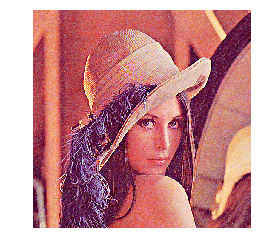

In [33]:
plt.imshow(lap_img)
plt.axis('off')
plt.show()

In [34]:
# 更凶猛的边缘效果
# 不仅考虑x-y方向上的梯度，同时考虑对角线方向上的梯度

In [35]:
kernel_sharp = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], np.float32)
kernel_sharp

array([[ 1.,  1.,  1.],
       [ 1., -8.,  1.],
       [ 1.,  1.,  1.]], dtype=float32)

In [36]:
sharp_img = cv2.filter2D(img, -1, kernel = kernel_sharp)
sharp_img

array([[[  0,   0,   0],
        [  0,   0,  24],
        [  9,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [126, 186, 120]],

       [[  0,   0,   0],
        [  0,   0,  24],
        [  9,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [126, 186, 120]],

       [[  0,   0,   0],
        [  0,   0,  24],
        [  9,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [126, 186, 120]],

       ...,

       [[  0,  27,   0],
        [ 27,  50,   0],
        [  0,   0,  18],
        ...,
        [  7,   0,   0],
        [ 24,   7,  37],
        [  0,  53,   0]],

       [[  6,   0,   9],
        [ 42,  17,  17],
        [  0,   0,   0],
        ...,
        [  0,   0,   2],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [ 42,  30,  15],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  6,   6,   0],
        [  0,   0,   0]]

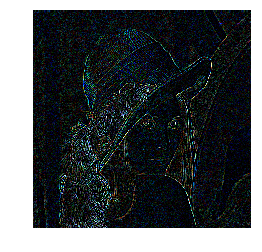

In [37]:
plt.imshow(sharp_img)
plt.axis('off')
plt.show()

In [38]:
############# Edge ################
# x轴

In [39]:
edgex = np.array([[-1, 2, -1], [0, 0, 0], [1, 2, 1]], np.float32)
edgex

array([[-1.,  2., -1.],
       [ 0.,  0.,  0.],
       [ 1.,  2.,  1.]], dtype=float32)

In [40]:
sharpx_img = cv2.filter2D(img, -1, kernel = edgex)
sharpx_img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255,  88, 228],
        [255,  94, 236],
        [255, 119, 231],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255,  88, 228],
        [255,  89, 235],
        [255, 129, 241],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255,  88, 228],
        [255,  88, 228],
        [255, 128, 248],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

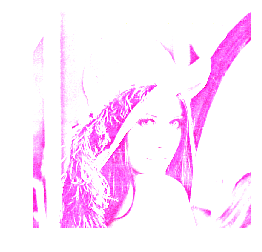

In [41]:
plt.imshow(sharpx_img)
plt.axis('off')
plt.show()

In [42]:
# y轴

In [43]:
edgey = np.array([[-1, 0, -1], [-2, 0, 2], [-1, 0, 1]], np.float32)
edgey

array([[-1.,  0., -1.],
       [-2.,  0.,  2.],
       [-1.,  0.,  1.]], dtype=float32)

In [44]:
sharpy_img = cv2.filter2D(img, -1, kernel = edgey)
sharpy_img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

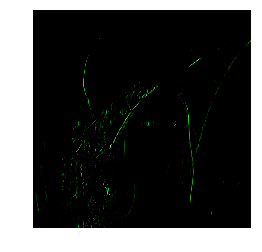

In [45]:
plt.imshow(sharpy_img)
plt.axis('off')
plt.show()

In [46]:
################## 角点 ##################

In [47]:
img = cv2.resize(img, (640, 480))
img

array([[[226, 137, 125],
        [226, 137, 125],
        [224, 137, 129],
        ...,
        [225, 139, 116],
        [215, 121, 104],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [224, 137, 129],
        ...,
        [225, 139, 116],
        [214, 121, 104],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [224, 137, 129],
        ...,
        [225, 139, 116],
        [214, 121, 104],
        [200,  99,  90]],

       ...,

       [[ 84,  19,  60],
        [ 84,  19,  60],
        [ 88,  23,  59],
        ...,
        [172,  70,  80],
        [172,  66,  77],
        [175,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 89,  27,  59],
        ...,
        [179,  70,  80],
        [181,  71,  80],
        [184,  73,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 89,  27,  59],
        ...,
        [180,  70,  80],
        [182,  72,  81],
        [185,  74,  81]]

In [48]:
img_gray = np.float32(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
img_gray

array([[144., 144., 145., ..., 142., 127., 108.],
       [144., 144., 145., ..., 142., 127., 108.],
       [144., 144., 145., ..., 142., 127., 108.],
       ...,
       [ 39.,  39.,  41., ...,  85.,  81.,  80.],
       [ 39.,  39.,  44., ...,  85.,  86.,  88.],
       [ 39.,  39.,  44., ...,  86.,  87.,  89.]], dtype=float32)

In [49]:
print(img_gray)

[[144. 144. 145. ... 142. 127. 108.]
 [144. 144. 145. ... 142. 127. 108.]
 [144. 144. 145. ... 142. 127. 108.]
 ...
 [ 39.  39.  41. ...  85.  81.  80.]
 [ 39.  39.  44. ...  85.  86.  88.]
 [ 39.  39.  44. ...  86.  87.  89.]]


In [50]:
img_harris = cv2.cornerHarris(img_gray, 2, 3, 0.05)
img_harris

array([[-1.2500000e-02, -1.2500000e-02, -5.0000001e-02, ...,
        -4.6512500e+03, -3.5490312e+04, -1.6704201e+04],
       [-1.2500000e-02, -1.2500000e-02, -5.0000001e-02, ...,
        -4.6512500e+03, -3.5490312e+04, -1.6704201e+04],
       [-1.2500000e-02, -1.2500000e-02, -5.0000001e-02, ...,
        -4.6512500e+03, -3.5490312e+04, -1.6704201e+04],
       ...,
       [-1.2539112e+01, -1.2539112e+01,  6.3822460e+01, ...,
         9.6335938e+01, -7.7450394e+01, -1.0721878e+01],
       [ 2.7328907e+01,  2.7328907e+01,  3.2717724e+01, ...,
         1.3500781e+01,  2.7190966e+01, -3.2757034e+01],
       [-5.0684085e+00, -5.0684085e+00, -4.4973831e+01, ...,
         1.5085937e+00,  2.3571095e+01,  2.3071093e+01]], dtype=float32)

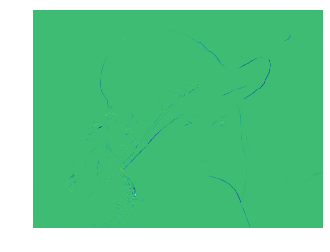

In [51]:
plt.imshow(img_harris)
plt.axis('off')
plt.show()

In [52]:
# 没法看原因：1. float类型 2. img_harris本质上是每个pixel对于harris函数的响应值
# 没有看的价值

In [53]:
print(img_harris)

[[-1.2500000e-02 -1.2500000e-02 -5.0000001e-02 ... -4.6512500e+03
  -3.5490312e+04 -1.6704201e+04]
 [-1.2500000e-02 -1.2500000e-02 -5.0000001e-02 ... -4.6512500e+03
  -3.5490312e+04 -1.6704201e+04]
 [-1.2500000e-02 -1.2500000e-02 -5.0000001e-02 ... -4.6512500e+03
  -3.5490312e+04 -1.6704201e+04]
 ...
 [-1.2539112e+01 -1.2539112e+01  6.3822460e+01 ...  9.6335938e+01
  -7.7450394e+01 -1.0721878e+01]
 [ 2.7328907e+01  2.7328907e+01  3.2717724e+01 ...  1.3500781e+01
   2.7190966e+01 -3.2757034e+01]
 [-5.0684085e+00 -5.0684085e+00 -4.4973831e+01 ...  1.5085937e+00
   2.3571095e+01  2.3071093e+01]]


In [54]:
#为了显示清楚

In [55]:
#img_harris = cv2.dilate(img_harris, None)
#img_harris

In [56]:
#plt.imshow(img_harris)
#plt.axis('off')
#plt.show()

In [57]:
thres = 0.05 * np.max(img_harris)
thres

456572.25

In [58]:
img[img_harris > thres] = [0, 0, 255]
img

array([[[226, 137, 125],
        [226, 137, 125],
        [224, 137, 129],
        ...,
        [225, 139, 116],
        [215, 121, 104],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [224, 137, 129],
        ...,
        [225, 139, 116],
        [214, 121, 104],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [224, 137, 129],
        ...,
        [225, 139, 116],
        [214, 121, 104],
        [200,  99,  90]],

       ...,

       [[ 84,  19,  60],
        [ 84,  19,  60],
        [ 88,  23,  59],
        ...,
        [172,  70,  80],
        [172,  66,  77],
        [175,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 89,  27,  59],
        ...,
        [179,  70,  80],
        [181,  71,  80],
        [184,  73,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 89,  27,  59],
        ...,
        [180,  70,  80],
        [182,  72,  81],
        [185,  74,  81]]

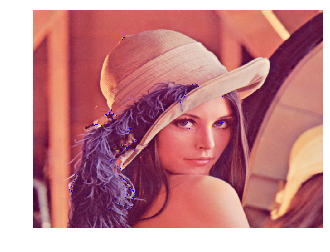

In [59]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [60]:
############ SIFT ######################

In [61]:
# create sift class

In [63]:
sift = cv2.xfeatures2d.SIFT_create()

In [64]:
# detect SIFT

In [65]:
kp = sift.detect(img, None)   # None for mask

In [66]:
# compute SIFT descriptor

In [70]:
kp, des = sift.compute(img, kp)
print(kp)
print(des)

[<KeyPoint 0000029E1C3EE8A0>, <KeyPoint 0000029E1C3EE750>, <KeyPoint 0000029E1C3EE7E0>, <KeyPoint 0000029E1C3EE0C0>, <KeyPoint 0000029E1C3EE9F0>, <KeyPoint 0000029E1C3EEA50>, <KeyPoint 0000029E1A052360>, <KeyPoint 0000029E1A0521E0>, <KeyPoint 0000029E1A052090>, <KeyPoint 0000029E1A0522A0>, <KeyPoint 0000029E1A052060>, <KeyPoint 0000029E1A052030>, <KeyPoint 0000029E1A0520F0>, <KeyPoint 0000029E1A0520C0>, <KeyPoint 0000029E1C0A9D50>, <KeyPoint 0000029E1C0A9E70>, <KeyPoint 0000029E1C0A99F0>, <KeyPoint 0000029E1C0A9E40>, <KeyPoint 0000029E1C0A9EA0>, <KeyPoint 0000029E1C0A99C0>, <KeyPoint 0000029E1C0A9930>, <KeyPoint 0000029E1C0A9D20>, <KeyPoint 0000029E1C0A9B70>, <KeyPoint 0000029E1C0A9CC0>, <KeyPoint 0000029E1C0A9DE0>, <KeyPoint 0000029E1C0A9DB0>, <KeyPoint 0000029E1C0A9E10>, <KeyPoint 0000029E1C0A9F30>, <KeyPoint 0000029E1C0A9C60>, <KeyPoint 0000029E1C0A9FC0>, <KeyPoint 0000029E1C0A9ED0>, <KeyPoint 0000029E1C0A9F90>, <KeyPoint 0000029E1C0A9F60>, <KeyPoint 0000029E1C0A9C00>, <KeyPoint 000

In [71]:
print(des.shape)

(1257, 128)


In [72]:
img_sift = cv2.drawKeypoints(img, kp, outImage = np.array([]), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

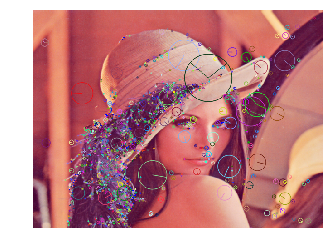

In [73]:
plt.imshow(img_sift)
plt.axis('off')
plt.show()